## LOGISTIC REGRESSION

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Data collection and Processing

In [ ]:
# loading csv data to a Pandas DataFrame
Health = pd.read_csv('/content/CVD_cleaned (1).csv')

In [ ]:
# print first 5 rows of the dtataset
Health.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
# print last 5 rows of the dataset
Health.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
89802,Excellent,Within the past 5 years,No,No,No,No,No,No,No,Male,55-59,183.0,136.08,40.69,Yes,0.0,8.0,4.0,0.0
89803,Fair,Within the past year,Yes,No,No,No,Yes,No,Yes,Male,50-54,168.0,77.11,27.44,Yes,1.0,0.0,0.0,7.0
89804,Poor,Within the past year,No,Yes,Yes,No,Yes,Yes,Yes,Male,60-64,188.0,116.12,32.87,Yes,15.0,0.0,2.0,0.0
89805,Good,Within the past year,Yes,Yes,No,No,No,"No, pre-diabetes or borderline diabetes",Yes,Female,70-74,163.0,74.84,28.32,No,0.0,60.0,30.0,3.0
89806,Good,Within the past year,No,No,No,No,Yes,No,Yes,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# getting some info about the data
Health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89807 entries, 0 to 89806
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                89807 non-null  object 
 1   Checkup                       89807 non-null  object 
 2   Exercise                      89807 non-null  object 
 3   Heart_Disease                 89807 non-null  object 
 4   Skin_Cancer                   89807 non-null  object 
 5   Other_Cancer                  89807 non-null  object 
 6   Depression                    89807 non-null  object 
 7   Diabetes                      89807 non-null  object 
 8   Arthritis                     89807 non-null  object 
 9   Sex                           89807 non-null  object 
 10  Age_Category                  89806 non-null  object 
 11  Height_(cm)                   89806 non-null  float64
 12  Weight_(kg)                   89806 non-null  float64
 13  B

In [ ]:
# checking for missing values
Health.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    1
Height_(cm)                     1
Weight_(kg)                     1
BMI                             1
Smoking_History                 1
Alcohol_Consumption             1
Fruit_Consumption               1
Green_Vegetables_Consumption    1
FriedPotato_Consumption         1
dtype: int64

In [ ]:
Health = Health.dropna()

In [ ]:
Health.isnull().sum().sum()

0

In [ ]:
#statistical measures about the data
Health.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,89806.000000,89806.000000,89806.000000,89806.00000,89806.000000,89806.000000,89806.000000
mean,170.683161,83.290999,28.496850,5.06543,29.586709,15.215687,6.464980
std,10.730898,21.428187,6.533579,8.18593,24.796373,15.113591,8.758146
min,91.000000,25.400000,12.160000,0.00000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.110000,0.00000,12.000000,4.000000,2.000000
50%,170.000000,81.190000,27.400000,1.00000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.620000,6.00000,30.000000,20.000000,8.000000
max,234.000000,293.020000,98.440000,30.00000,120.000000,120.000000,120.000000




```
# This is formatted as code
```

Outlier Analysis

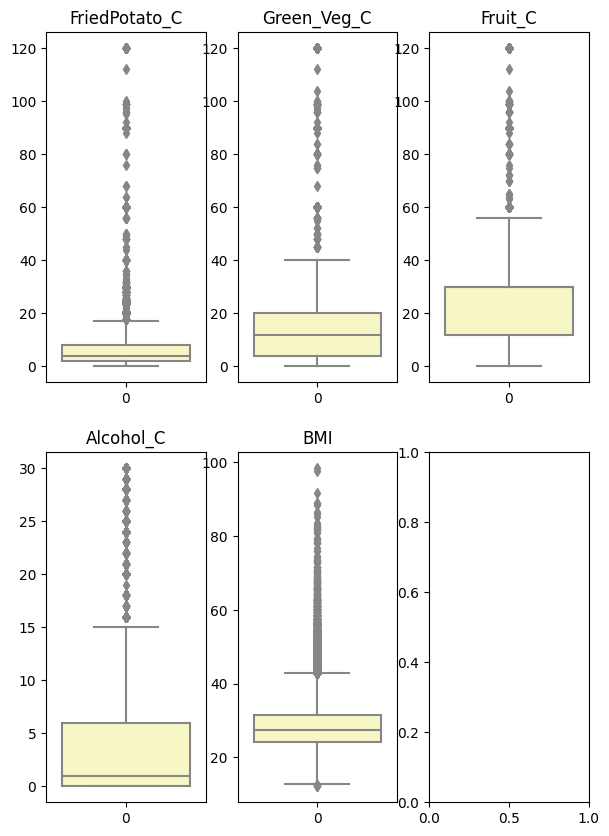

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(7,10))

sns.boxplot(ax=axes[0, 0], data=Health['FriedPotato_Consumption'], palette='Spectral')
axes[0,0].set_title("FriedPotato_C");

sns.boxplot(ax=axes[0, 1], data=Health['Green_Vegetables_Consumption'], palette='Spectral')
axes[0, 1].set_title("Green_Veg_C");

sns.boxplot(ax=axes[0, 2], data=Health['Fruit_Consumption'], palette='Spectral')
axes[0, 2].set_title("Fruit_C");

sns.boxplot(ax=axes[1, 0], data=Health['Alcohol_Consumption'], palette='Spectral')
axes[1, 0].set_title("Alcohol_C");

sns.boxplot(ax=axes[1, 1], data=Health['BMI'], palette='Spectral')
axes[1, 1].set_title("BMI");

# Splitting the dataset into lables and features

In [ ]:
X = Health.drop(columns='General_Health',axis=1)
Y = Health['General_Health']

In [ ]:
X

,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89801,5 or more years ago,Yes,No,No,No,No,No,No,Male,75-79,193.0,112.04,30.07,Yes,30.0,20.0,15.0,30.0
89802,Within the past 5 years,No,No,No,No,No,No,No,Male,55-59,183.0,136.08,40.69,Yes,0.0,8.0,4.0,0.0
89803,Within the past year,Yes,No,No,No,Yes,No,Yes,Male,50-54,168.0,77.11,27.44,Yes,1.0,0.0,0.0,7.0
89804,Within the past year,No,Yes,Yes,No,Yes,Yes,Yes,Male,60-64,188.0,116.12,32.87,Yes,15.0,0.0,2.0,0.0


In [ ]:
Y

0             Poor
1        Very Good
2        Very Good
3             Poor
4             Good
           ...    
89801    Excellent
89802    Excellent
89803         Fair
89804         Poor
89805         Good
Name: General_Health, Length: 89806, dtype: object

In [ ]:
# Shape of dataset
rows, col = X.shape
print("rows : %s, column : %s" %(rows,col))

rows : 89806, column : 18


In [ ]:
X.shape

(89806, 18)

In [ ]:
Y.shape

(89806,)

# converting string to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Checkup']= le.fit_transform(X['Checkup'])
X['Exercise']= le.fit_transform(X['Exercise'])
X['Heart_Disease']= le.fit_transform(X['Heart_Disease'])
X['Skin_Cancer']= le.fit_transform(X['Skin_Cancer'])
X['Other_Cancer']= le.fit_transform(X['Other_Cancer'])
X['Depression']= le.fit_transform(X['Depression'])
X['Diabetes']= le.fit_transform(X['Diabetes'])
X['Arthritis']= le.fit_transform(X['Arthritis'])
X['Sex']= le.fit_transform(X['Sex'])
X['Smoking_History']= le.fit_transform(X['Smoking_History'])
X['Age_Category']= le.fit_transform(X['Age_Category'])

In [ ]:
X

,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89801,0,1,0,0,0,0,0,0,1,11,193.0,112.04,30.07,1,30.0,20.0,15.0,30.0
89802,3,0,0,0,0,0,0,0,1,7,183.0,136.08,40.69,1,0.0,8.0,4.0,0.0
89803,4,1,0,0,0,1,0,1,1,6,168.0,77.11,27.44,1,1.0,0.0,0.0,7.0
89804,4,0,1,1,0,1,2,1,1,8,188.0,116.12,32.87,1,15.0,0.0,2.0,0.0


In [ ]:
Y

0             Poor
1        Very Good
2        Very Good
3             Poor
4             Good
           ...    
89801    Excellent
89802    Excellent
89803         Fair
89804         Poor
89805         Good
Name: General_Health, Length: 89806, dtype: object

Plotting Pairplot graph

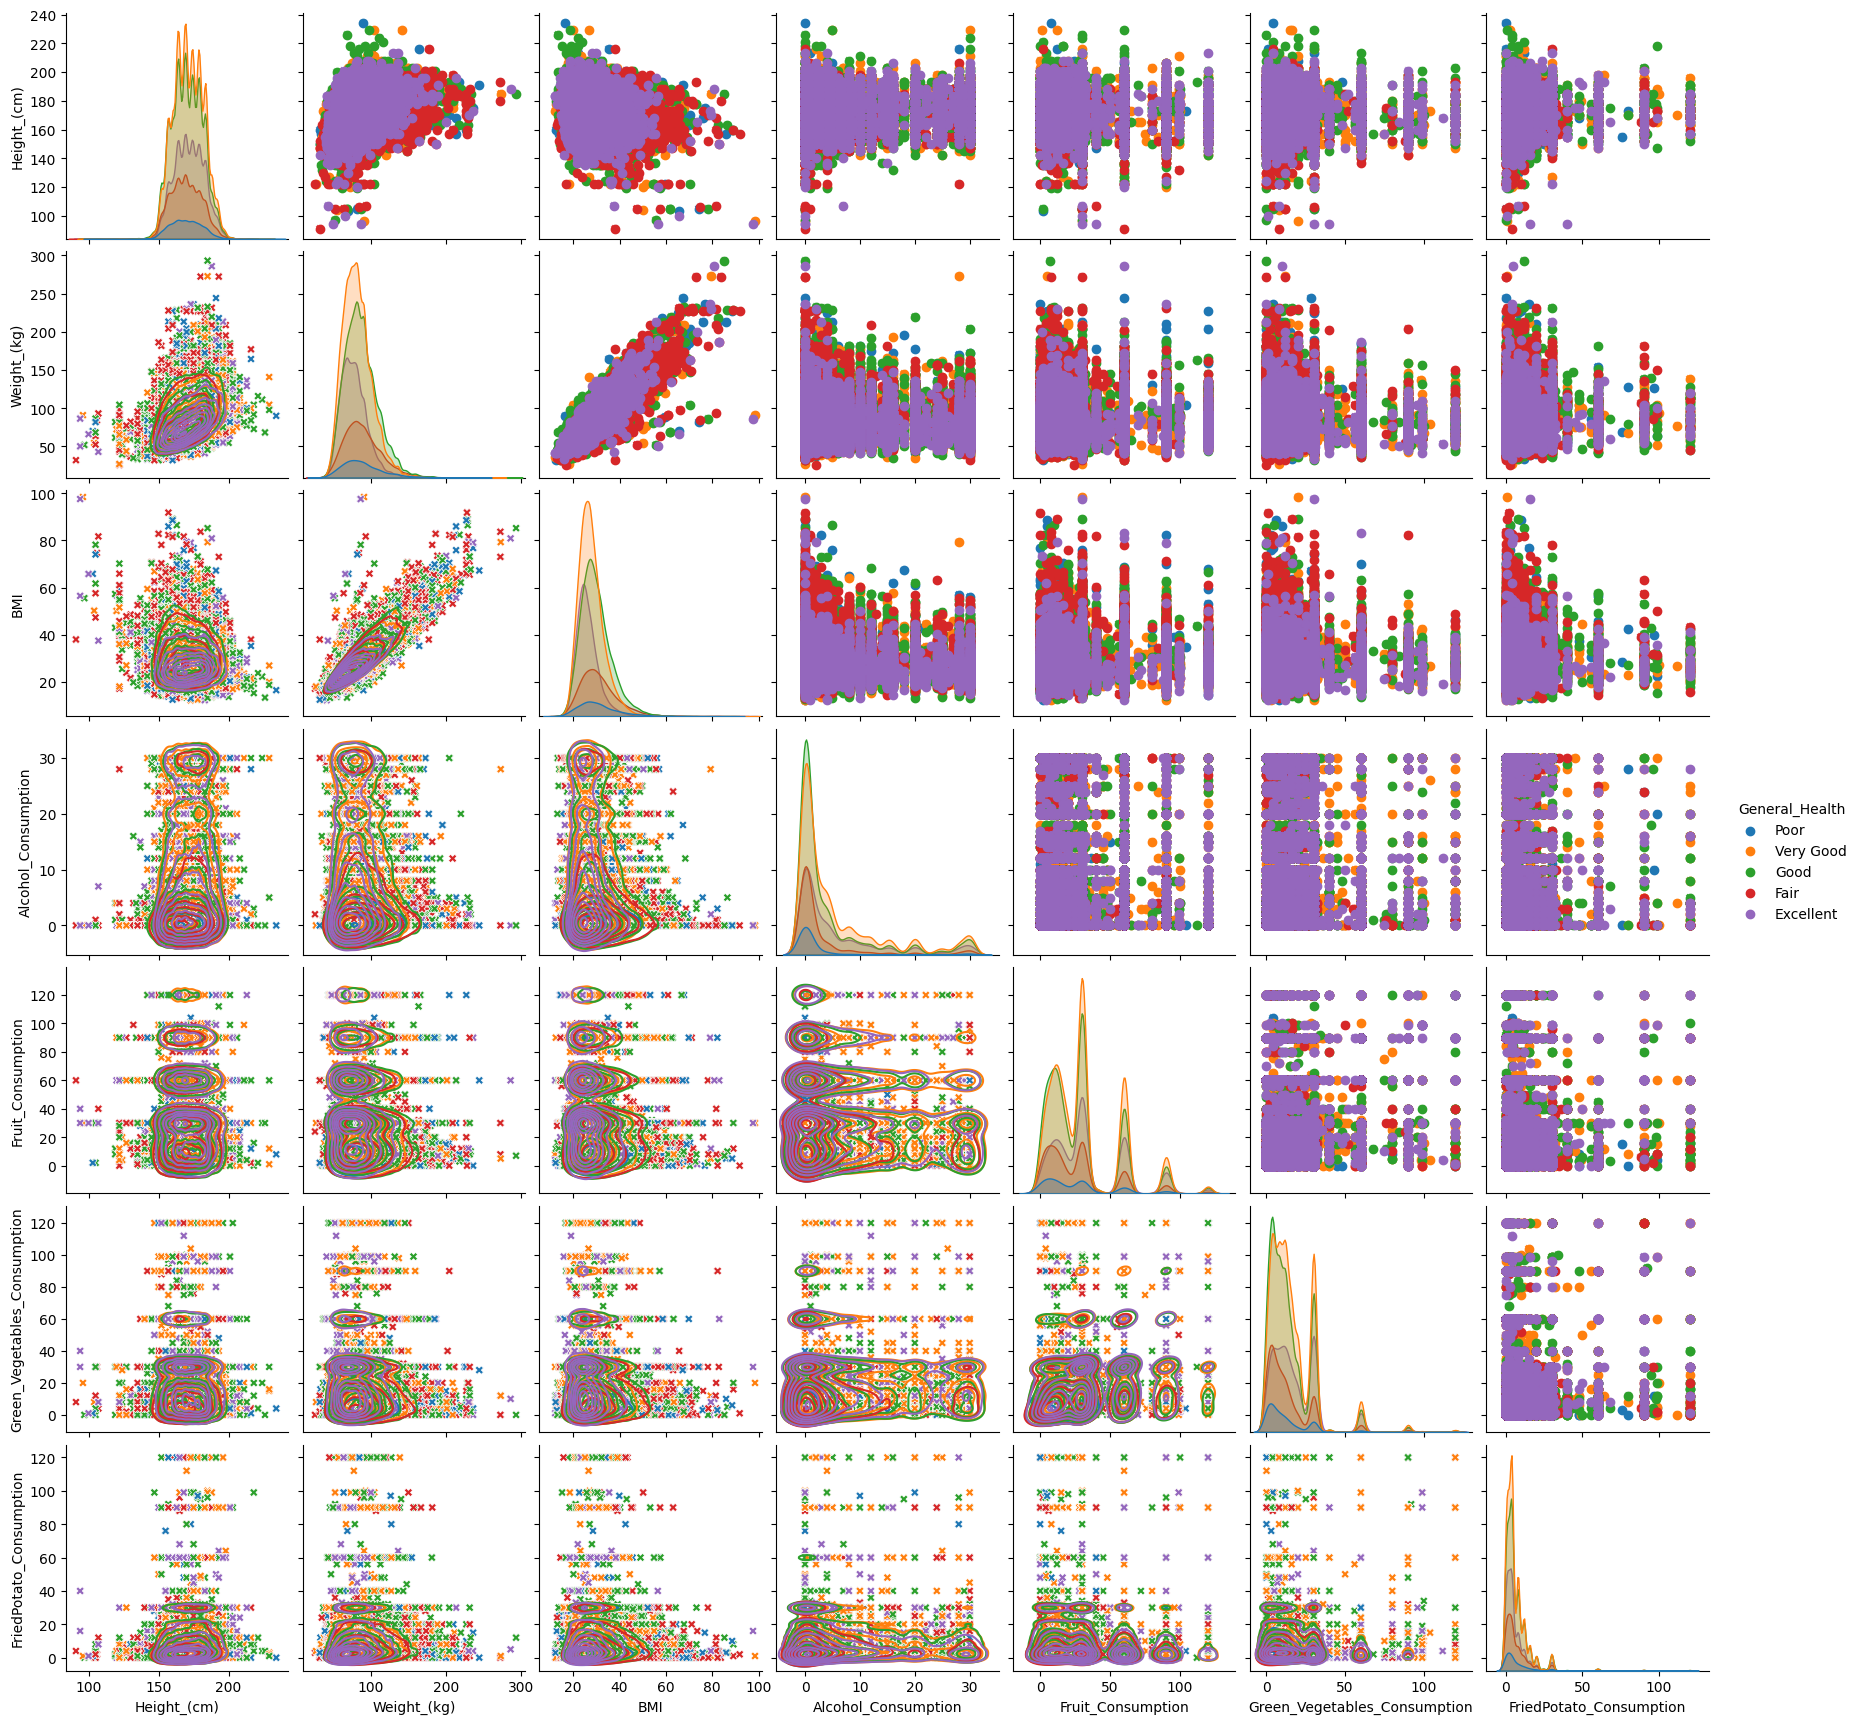

In [ ]:
g = sns.pairplot(Health, hue = 'General_Health',markers = 'X')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

Plotting Violinplot graph

In [ ]:
sns.violinplot(X='Checkup' , Y='General_Health', data=Health, inner='stick', palette='autumn')
plt.show()
sns.violinplot(X='Heart_Disease' , Y='General_Health', data=Health, inner='stick', palette='autumn')
plt.show()
sns.violinplot(X='Exercise' , Y='General_Health', data=Health, inner='stick', palette='autumn')
plt.show()
sns.violinplot(X='Skin_Cancer' , Y='General_Health', data=Health, inner='stick', palette='autumn')
plt.show()

### Splitting the Data into Training data and Test data

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split( X,Y,test_size=0.2, random_state=42)

In [ ]:
X_train.shape

In [ ]:
Y_train.shape

(23932,)

In [ ]:
X_train.head()

,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
22096,2,1,0,0,0,0,0,0,1,0,183.0,99.34,29.70,0,0.0,12.0,2.0,8.0
3995,4,1,0,1,0,0,0,0,0,9,160.0,62.14,24.27,1,10.0,20.0,15.0,2.0
465,4,0,0,0,0,0,2,0,0,9,170.0,91.63,31.64,1,0.0,60.0,8.0,4.0
20480,2,1,0,0,0,0,0,0,0,2,160.0,54.43,21.26,0,8.0,4.0,12.0,0.0
19405,2,1,0,0,0,0,0,0,1,4,180.0,77.11,23.71,0,0.0,60.0,0.0,4.0


In [ ]:
X_test.head()

,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
25126,4,0,0,0,0,0,2,0,0,8,160.0,116.12,45.35,1,0.0,4.0,1.0,0.0
22709,4,1,0,0,0,0,0,1,1,8,185.0,93.89,27.31,0,0.0,30.0,20.0,0.0
16143,4,0,0,0,0,0,0,1,0,11,157.0,72.57,29.26,0,0.0,30.0,0.0,1.0
13524,4,1,0,0,1,0,0,0,0,5,175.0,90.72,29.53,0,1.0,60.0,25.0,15.0
26227,4,1,0,0,0,0,0,0,0,7,157.0,70.76,28.53,0,0.0,8.0,8.0,2.0


In [ ]:
X_train =X

In [ ]:
Y_train = Y

# Create ML model

In [ ]:
model1 = LogisticRegression()

# Fit Model

In [ ]:
model1.fit(X_train, Y_train)

### Prediction

In [ ]:
Y_Pred = model1.predict(X_test)

In [ ]:
X_test

In [ ]:
X_test.head()

,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
25126,4,0,0,0,0,0,2,0,0,8,160.0,116.12,45.35,1,0.0,4.0,1.0,0.0
22709,4,1,0,0,0,0,0,1,1,8,185.0,93.89,27.31,0,0.0,30.0,20.0,0.0
16143,4,0,0,0,0,0,0,1,0,11,157.0,72.57,29.26,0,0.0,30.0,0.0,1.0
13524,4,1,0,0,1,0,0,0,0,5,175.0,90.72,29.53,0,1.0,60.0,25.0,15.0
26227,4,1,0,0,0,0,0,0,0,7,157.0,70.76,28.53,0,0.0,8.0,8.0,2.0


In [ ]:
Y_test[:5]

In [ ]:
Y_Pred

array(['Good', 'Very Good', 'Good', ..., 'Very Good', 'Good', 'Very Good'],
      dtype=object)

In [ ]:
Y_test

25126         Good
22709    Excellent
16143         Poor
13524         Good
26227         Good
           ...    
7821          Poor
16739         Good
10322    Very Good
11751    Very Good
1713     Very Good
Name: General_Health, Length: 5984, dtype: object

# Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(Y_test, Y_Pred)

array([[  87,    1,  223,    0,  770],
       [  12,    4,  463,    0,  265],
       [  49,    1,  915,    0,  884],
       [   2,    1,  162,    0,   89],
       [ 103,    1,  631,    0, 1321]])

Accuracy

In [ ]:
accuracy = accuracy_score(Y_test, Y_Pred)*100
print("Accuracy of the model1 is {:.2f}".format(accuracy))

Accuracy of the model1 is 38.89


Heatmap Visualization

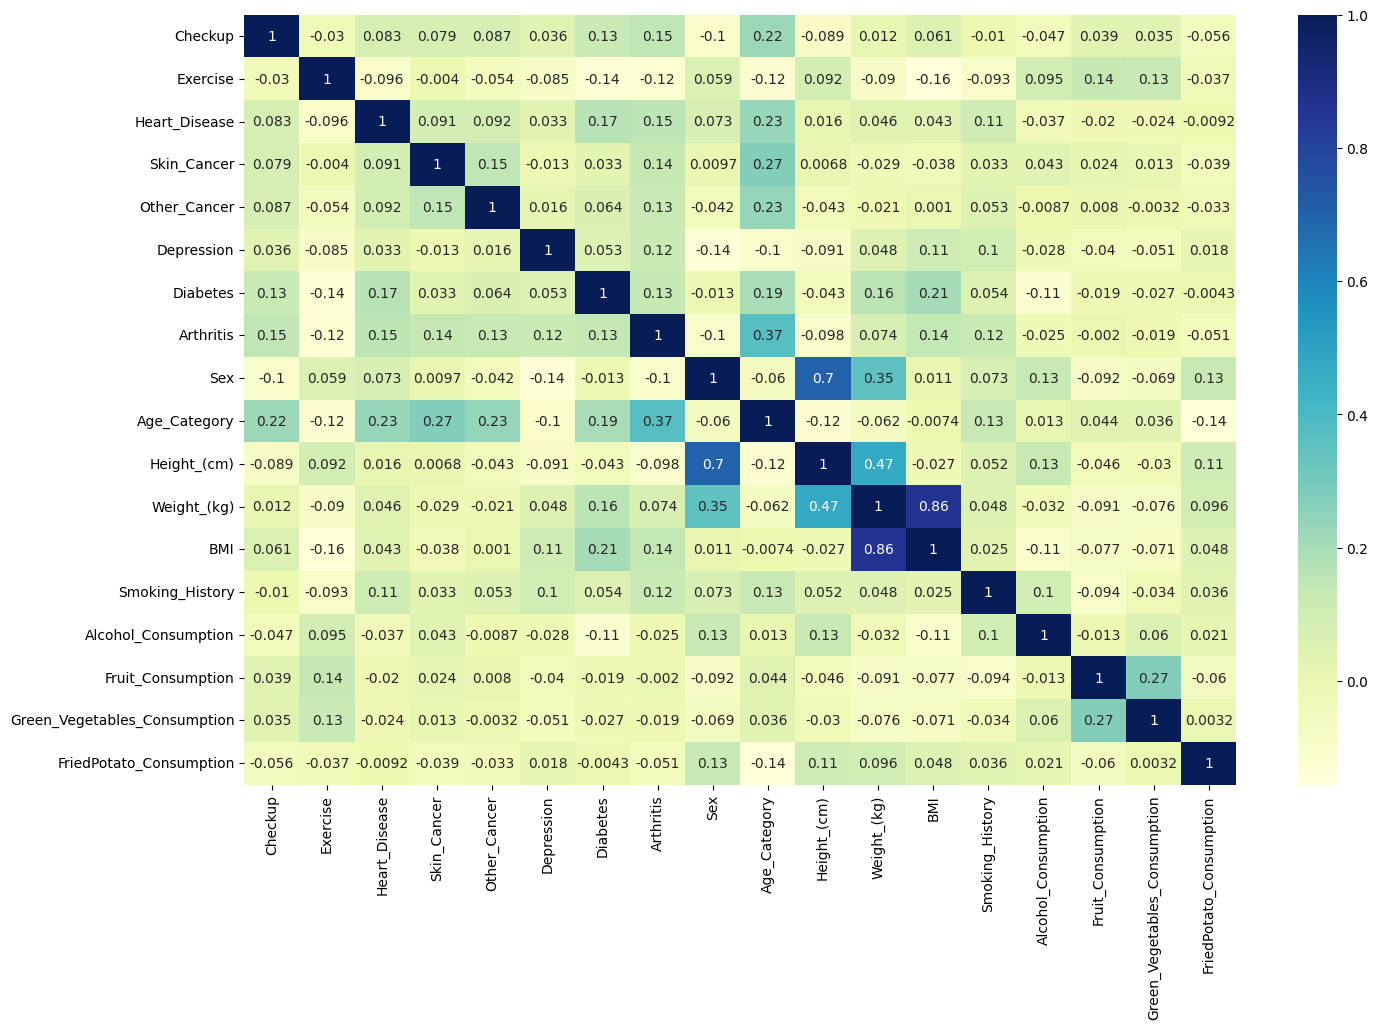

In [ ]:
plt.figure(figsize = (16,10))
sns.heatmap(X_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()